In [34]:
import iResNet

import torch
import torch.nn as nn
import torch.utils.data as data
import torch.optim as optim

import importlib
importlib.reload(iResNet)

<module 'iResNet' from '/home/yanbo/Research/Lab/eLIFE/iResNetLab/src/iResNet.py'>

# FCN

In [52]:
model = iResNet.FCN(2, 1)
model

FCN(
  (net): SNFCN(
    (g): Sequential(
      (0): Linear(in_features=2, out_features=16, bias=True)
      (1): GELU()
      (2): Linear(in_features=16, out_features=16, bias=True)
      (3): GELU()
      (4): Linear(in_features=16, out_features=2, bias=True)
    )
  )
  (noise): NormalDistribution()
)

In [53]:
x = torch.Tensor([[1,2], [3,4]])
x.requires_grad = True
model.train()

y, p, logdet = model(x)
y

tensor([[0.7239],
        [2.7052]], grad_fn=<SliceBackward>)

In [55]:
p

tensor([ -3.5499, -15.0331], grad_fn=<AddBackward0>)

In [59]:
model.inverse(y.detach())

tensor([[1.0064, 2.3960],
        [2.9619, 0.1218]])

## Sequential

In [69]:
model = iResNet.Sequential(iResNet.FCN(2, 2),
                           iResNet.FCN(2, 2),
                           iResNet.FCN(2, 1))
print(model)

Sequential(
  (0): FCN(
    (net): SNFCN(
      (g): Sequential(
        (0): Linear(in_features=2, out_features=16, bias=True)
        (1): GELU()
        (2): Linear(in_features=16, out_features=16, bias=True)
        (3): GELU()
        (4): Linear(in_features=16, out_features=2, bias=True)
      )
    )
    (noise): NormalDistribution()
  )
  (1): FCN(
    (net): SNFCN(
      (g): Sequential(
        (0): Linear(in_features=2, out_features=16, bias=True)
        (1): GELU()
        (2): Linear(in_features=16, out_features=16, bias=True)
        (3): GELU()
        (4): Linear(in_features=16, out_features=2, bias=True)
      )
    )
    (noise): NormalDistribution()
  )
  (2): FCN(
    (net): SNFCN(
      (g): Sequential(
        (0): Linear(in_features=2, out_features=16, bias=True)
        (1): GELU()
        (2): Linear(in_features=16, out_features=16, bias=True)
        (3): GELU()
        (4): Linear(in_features=16, out_features=2, bias=True)
      )
    )
    (noise): NormalDi

In [70]:
x = torch.Tensor([[1,2], [3,4], [-3,1]])
x.requires_grad = True
model.train()

y, p, logdet = model(x)
y

tensor([[ 1.5428],
        [ 3.9347],
        [-2.7151]], grad_fn=<SliceBackward>)

In [72]:
logdet

tensor([ 0.3496, -0.0291,  0.2453], grad_fn=<AddBackward0>)

In [62]:
x = torch.Tensor([[1,2], [3,4], [-2, 1]])
x.requires_grad = True
model.eval()

y = model(x)
y

tensor([[ 0.8402,  2.0901],
        [ 2.7896,  4.0990],
        [-2.1957,  1.1529]], grad_fn=<SliceBackward>)

In [20]:
model.inverse(y.detach())

tensor([[ 1.0000,  2.0000],
        [ 3.0000,  4.0000],
        [-2.0000,  1.0000]])

# Conv1d

In [84]:
model = iResNet.Sequential(iResNet.Conv1d(channel=2, kernel_size=3),
                           iResNet.Conv1d(channel=2, kernel_size=1),
                           iResNet.Conv1d(channel=2, kernel_size=3))
model

Sequential(
  (0): Conv1d(
    (net): SNCov1d(
      (net): Sequential(
        (0): Conv1d(2, 16, kernel_size=(3,), stride=(1,), padding=(1,))
        (1): GELU()
        (2): Conv1d(16, 16, kernel_size=(3,), stride=(1,), padding=(1,))
        (3): GELU()
        (4): Conv1d(16, 2, kernel_size=(3,), stride=(1,), padding=(1,))
      )
    )
  )
  (1): Conv1d(
    (net): SNCov1d(
      (net): Sequential(
        (0): Conv1d(2, 16, kernel_size=(1,), stride=(1,))
        (1): GELU()
        (2): Conv1d(16, 16, kernel_size=(1,), stride=(1,))
        (3): GELU()
        (4): Conv1d(16, 2, kernel_size=(1,), stride=(1,))
      )
    )
  )
  (2): Conv1d(
    (net): SNCov1d(
      (net): Sequential(
        (0): Conv1d(2, 16, kernel_size=(3,), stride=(1,), padding=(1,))
        (1): GELU()
        (2): Conv1d(16, 16, kernel_size=(3,), stride=(1,), padding=(1,))
        (3): GELU()
        (4): Conv1d(16, 2, kernel_size=(3,), stride=(1,), padding=(1,))
      )
    )
  )
)

In [85]:
x = torch.Tensor([[[1,2,3,4,5],[-1,-2,-3,-4,-5]], [[1,2,0,4,5],[-1,-2,0,-4,-5]]])
x.requires_grad = True

y, logp, logdet = model(x)
y

tensor([[[ 9.8334e-01,  2.0234e+00,  3.0385e+00,  4.2037e+00,  5.1804e+00],
         [-1.1709e+00, -2.1974e+00, -3.2554e+00, -4.2121e+00, -5.1788e+00]],

        [[ 1.0371e+00,  2.0080e+00, -2.1772e-03,  4.1299e+00,  5.2609e+00],
         [-1.1364e+00, -2.1973e+00, -2.2076e-01, -4.2422e+00, -5.1010e+00]]],
       grad_fn=<AddBackward0>)

In [86]:
model.inverse(y)

tensor([[[ 1.0000e+00,  2.0000e+00,  3.0000e+00,  4.0000e+00,  5.0000e+00],
         [-1.0000e+00, -2.0000e+00, -3.0000e+00, -4.0000e+00, -5.0000e+00]],

        [[ 1.0000e+00,  2.0000e+00,  1.4901e-08,  4.0000e+00,  5.0000e+00],
         [-1.0000e+00, -2.0000e+00, -4.4703e-08, -4.0000e+00, -5.0000e+00]]])

# Conv2d

In [87]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
model = iResNet.Sequential(iResNet.Conv2d(channel=2, kernel_size=3),
                           iResNet.Conv2d(channel=2, kernel_size=3),
                           iResNet.Conv2d(channel=2, kernel_size=3),
                           iResNet.Conv2d(channel=2, kernel_size=3),
                           iResNet.Conv2d(channel=2, kernel_size=3),
                           iResNet.Conv2d(channel=2, kernel_size=3)
                          )

In [89]:
optimizer = optim.Adam(model.parameters(), lr=0.01)

for i in range(10):
    optimizer.zero_grad()
    x = torch.Tensor([[[[1,1,1],[0,1,0],[0,1,0]], [[0,1,0],[1,1,1],[0,1,0]]]])
    x.requires_grad = True
    
    target = torch.Tensor([[[[0,0,0],[0,1,0],[0,0,0]], [[0,0,0],[0,1,0],[0,0,0]]]])
    y, logp, logdet = model(x)
    loss = nn.MSELoss()(y, target)
    loss.backward()
    
    optimizer.step()

In [90]:
x = torch.Tensor([[[[1,1,1],[0,1,0],[0,1,0]], [[0,1,0],[1,1,1],[0,1,0]]],
                 [[[1,1,1],[0,1,0],[0,1,0]], [[0,1,0],[1,1,1],[0,1,0]]]])
x.requires_grad = True

y, logp, logdet = model(x)
y

tensor([[[[-8.7358e-02, -6.3683e-02, -3.1601e-02],
          [-6.5307e-02,  9.9927e-01, -1.1066e-01],
          [-1.7788e-01, -2.3931e-01, -1.7276e-01]],

         [[-6.2872e-02,  7.6026e-02, -1.2349e-02],
          [ 2.0250e-02,  1.0624e+00,  5.9287e-02],
          [ 3.0231e-02,  1.4881e-02,  1.2122e-05]]],


        [[[-8.7358e-02, -6.3683e-02, -3.1601e-02],
          [-6.5307e-02,  9.9927e-01, -1.1066e-01],
          [-1.7788e-01, -2.3931e-01, -1.7276e-01]],

         [[-6.2872e-02,  7.6026e-02, -1.2349e-02],
          [ 2.0250e-02,  1.0624e+00,  5.9287e-02],
          [ 3.0231e-02,  1.4881e-02,  1.2122e-05]]]], grad_fn=<AddBackward0>)

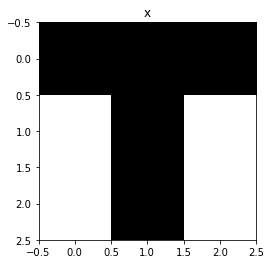

In [91]:
plt.imshow(1-x[0, 0].detach(), cmap='gray')
plt.title('x')
#plt.savefig('cov2d_x.png')
plt.show()

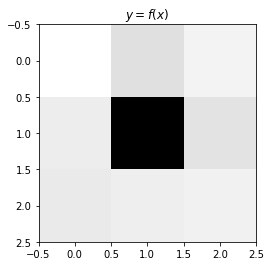

In [92]:
plt.imshow(1-y[0, 1].detach(), cmap='gray')
plt.title('$y=f(x)$')
#plt.savefig('cov2d_y.png')
plt.show()

In [93]:
xhat = model.inverse(y)
xhat

tensor([[[[ 1.0000e+00,  1.0000e+00,  1.0000e+00],
          [ 0.0000e+00,  1.0000e+00, -7.4506e-09],
          [ 1.6764e-08,  1.0000e+00,  2.0489e-08]],

         [[ 2.2352e-08,  1.0000e+00,  4.8196e-08],
          [ 1.0000e+00,  1.0000e+00,  1.0000e+00],
          [-3.7253e-09,  1.0000e+00,  1.1176e-08]]],


        [[[ 1.0000e+00,  1.0000e+00,  1.0000e+00],
          [ 0.0000e+00,  1.0000e+00, -7.4506e-09],
          [ 1.6764e-08,  1.0000e+00,  2.0489e-08]],

         [[ 2.2352e-08,  1.0000e+00,  4.8196e-08],
          [ 1.0000e+00,  1.0000e+00,  1.0000e+00],
          [-3.7253e-09,  1.0000e+00,  1.1176e-08]]]])

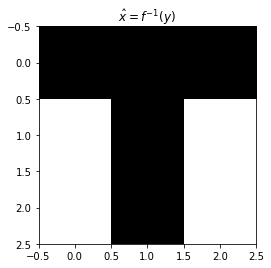

In [94]:
plt.imshow(1-xhat[0, 0].detach(), cmap='gray')
plt.title('$\hat x = f^{-1}(y)$')
#plt.savefig('cov2d_x_hat.png')
plt.show()

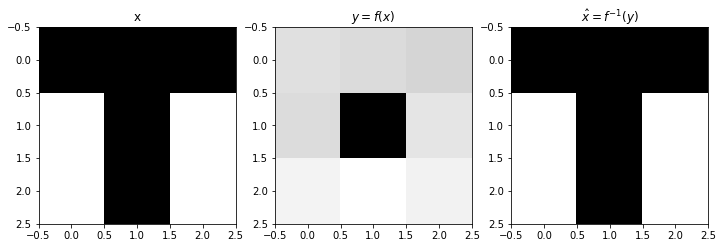

In [97]:
fig = plt.figure(figsize=(12,4))

fig = plt.subplot(131)
plt.imshow(1-x[0, 0].detach(), cmap='gray')
plt.title('x')

fig = plt.subplot(132)
plt.imshow(1-y[0, 0].detach(), cmap='gray')
plt.title('$y=f(x)$')

fig = plt.subplot(133)
plt.imshow(1-xhat[0, 0].detach(), cmap='gray')
plt.title('$\hat x = f^{-1}(y)$')

plt.savefig('../images/cov2d.png')
plt.show()